In [0]:
import pandas as pd
import numpy as np
import seaborn as sb

In [0]:
train=pd.read_csv("/content/drive/My Drive/train.csv")
test=pd.read_csv("/content/drive/My Drive/test.csv")

In [0]:
train.shape

(82657, 12)

In [0]:
y_train=train['variety']
train.drop("variety",axis=1,inplace=True)

In [0]:
cmbn=[train,test]
train_test=pd.concat(cmbn)
train_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre


In [0]:
train_test.drop("user_name",axis=1,inplace=True)
train_test.drop("review_title",axis=1,inplace=True)
train_test.drop("review_description",axis=1,inplace=True)

In [0]:
train_test.isnull().any()

country         True
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
winery         False
dtype: bool

In [0]:
train_test['country'].fillna(train['country'].mode()[0],inplace=True)
train_test['price'].fillna(train['price'].mean(),inplace=True)
train_test['province'].fillna(train['province'].mode()[0],inplace=True)
train_test['region_1'].fillna(train['region_1'].mode()[0],inplace=True)
train_test['region_2'].fillna(train['region_2'].mode()[0],inplace=True)

In [0]:
train_test.isnull().any()

country        False
designation     True
points         False
price          False
province       False
region_1       False
region_2       False
winery         False
dtype: bool

In [0]:
train['designation'].unique().shape

(26425,)

In [0]:
train['winery'].unique().shape

(13786,)

In [0]:
train_test.drop("designation",axis=1,inplace=True)
train_test.drop("winery",axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_test['country']=le.fit_transform(train_test['country'])
train_test['province']=le.fit_transform(train_test['province'])
train_test['region_1']=le.fit_transform(train_test['region_1'])
train_test['region_2']=le.fit_transform(train_test['region_2'])
y_train=le.fit_transform(y_train)

In [0]:
train_test

,country,points,price,province,region_1,region_2
0,2,83,10.0,19,879,1
1,37,89,15.0,356,247,3
2,19,94,80.0,243,65,1
3,12,87,22.0,291,87,1
4,12,88,33.0,108,986,1
...,...,...,...,...,...,...
20660,37,91,34.0,44,1053,9
20661,12,84,20.0,155,259,1
20662,37,94,85.0,44,684,1
20663,34,80,9.0,220,1024,1


In [0]:
#for visualization
temp=train_test.iloc[0:82657]
temp['variety']=y_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


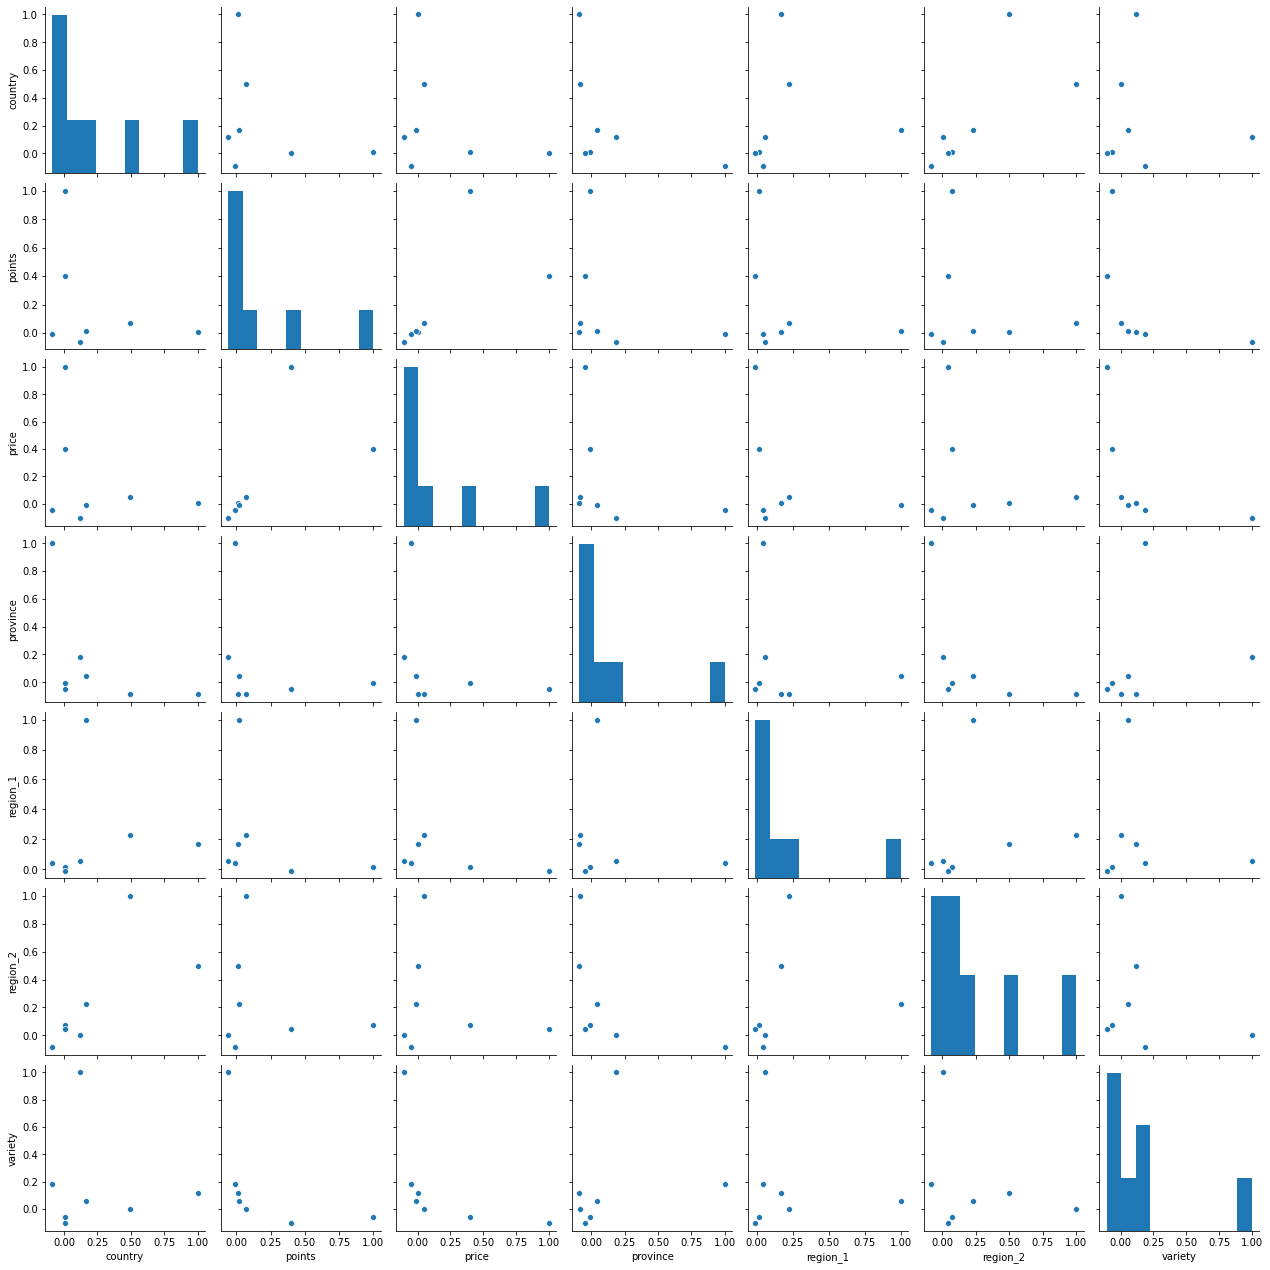

In [0]:
sb.pairplot(temp.corr())

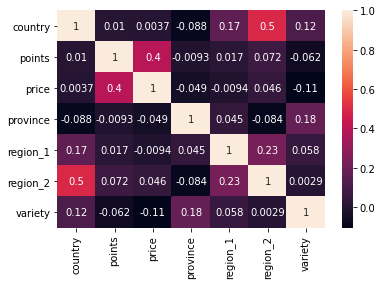

In [0]:
sb.heatmap(temp.corr(),annot=True)

In [0]:
x_train_test=train_test.iloc[0:,:].values

In [0]:
x_train_test

array([[2.000e+00, 8.300e+01, 1.000e+01, 1.900e+01, 8.790e+02, 1.000e+00],
       [3.700e+01, 8.900e+01, 1.500e+01, 3.560e+02, 2.470e+02, 3.000e+00],
       [1.900e+01, 9.400e+01, 8.000e+01, 2.430e+02, 6.500e+01, 1.000e+00],
       ...,
       [3.700e+01, 9.400e+01, 8.500e+01, 4.400e+01, 6.840e+02, 1.000e+00],
       [3.400e+01, 8.000e+01, 9.000e+00, 2.200e+02, 1.024e+03, 1.000e+00],
       [3.700e+01, 8.700e+01, 4.000e+01, 4.400e+01, 4.710e+02, 1.000e+00]])

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
y_train.shape

(82657,)

In [0]:
y_train.shape

(82657,)

In [0]:
one=OneHotEncoder()
z1=one.fit_transform(x_train_test[:,0:1]).toarray()
z2=one.fit_transform(x_train_test[:,3:4]).toarray()
z3=one.fit_transform(x_train_test[:,4:5]).toarray()
z4=one.fit_transform(x_train_test[:,5:6]).toarray()
train_test=np.delete(x_train_test,[0,3,4,5],axis=1)
x_train_test=np.concatenate((z1,z2,z3,z4,x_train_test),axis=1)

In [0]:
one=OneHotEncoder()
z=one.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train=np.delete(y_train.reshape(-1, 1),[0],axis=1)
y_train=np.concatenate((z,y_train),axis=1)

In [0]:
x_train=x_train_test[0:82657,:]
x_test=x_train_test[82658:103322,:]

In [0]:
x_test.shape

(20664, 1489)

In [0]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [0]:
y_train.shape

(82657, 28)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(units=1434,init = "uniform",activation="relu"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1434, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(units=717,init="uniform",activation="relu"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=717, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(units=28,init="uniform",activation="softmax"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=28, activation="softmax", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [77]:
classifier.fit(x_train,y_train,batch_size=16,epochs=90)

Epoch 1/100
82657/82657 [==============================] - 118s 1ms/step - loss: 1.6012 - accuracy: 0.5108
Epoch 2/100
82657/82657 [==============================] - 121s 1ms/step - loss: 1.4850 - accuracy: 0.5301
Epoch 3/100
82657/82657 [==============================] - 122s 1ms/step - loss: 1.4863 - accuracy: 0.5350
Epoch 4/100
82657/82657 [==============================] - 120s 1ms/step - loss: 1.4656 - accuracy: 0.5339
Epoch 5/100
82657/82657 [==============================] - 120s 1ms/step - loss: 1.4581 - accuracy: 0.5367
Epoch 6/100
82657/82657 [==============================] - 119s 1ms/step - loss: 1.4641 - accuracy: 0.5371
Epoch 7/100
82657/82657 [==============================] - 120s 1ms/step - loss: 1.4531 - accuracy: 0.5382
Epoch 8/100
82657/82657 [==============================] - 125s 2ms/step - loss: 1.4604 - accuracy: 0.5365
Epoch 9/100
82657/82657 [==============================] - 122s 1ms/step - loss: 1.4446 - accuracy: 0.5361
Epoch 10/100
82657/82657 [===========

In [78]:
y_pred=classifier.predict(x_test)
predicted=le.inverse_transform(one.inverse_transform(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
df=pd. DataFrame(data=predicted.reshape(-1,1), columns=["variety"])
df.to_csv(r'pridicted.csv', index = True)

In [80]:
predicted.reshape(-1,1)

array([['Malbec'],
       ['Cabernet Sauvignon'],
       ['Malbec'],
       ...,
       ['Cabernet Sauvignon'],
       ['Red Blend'],
       ['Cabernet Sauvignon']], dtype=object)